# Backpropagation
In the previous exercise, you implemented <strong>feedforward propagation</strong> for neural networks and used it to predict handwritten digits with the weights we provided. In this exercise, you will implement the <strong>backpropagation</strong> algorithm to learn the parameters for the neural network.<br><br>

In this part of the exercise, you will implement a neural network to recognize handwritten digits using the same training set as before. The <strong>neural network</strong> will be able to represent complex models that form <strong>non-linear hypotheses</strong>. For this week, you will be using parameters from <strong>a neural network that we have already trained</strong>. In this exercise, you will write the backpropagation algorithm for learning the neural network parameters.<br><br>

The file <strong><em>ex4data1</em></strong> contains a training set.<br>
The structure of the dataset described blow:<br>
1. X array = <strong>400 columns describe the values of pixels of 20*20 images in flatten format for 5000 samples</strong>
2. y array = <strong>Value of image (number between 0-9)</strong>


<br><br>
<strong>
Our assignment has these sections:
1. Visualizing the Data
    1. Converting .mat to .csv
    2. Loading Dataset and Trained Neural Network Weights
    3. Ploting Data
2. Model Representation
3. Backpropagation
    1. Encoding y labels (onehot)
    2. Sigmoid Gradient
    3. Random Initialization
    4. Backpropagation
4. Gradient Checking
5. Learning Parameters Using `fmin_cg`
6. Visualizing the Hidden Layer
7. Try out Different Learning Settings
</strong>

In each section full description provided.

## 1. Visualizing the Dataset
Before starting on any task, it is often useful to understand the data by visualizing it.<br>

### 1.A Converting .mat to .csv
In this specific assignment, the instructor added a .mat file as training set and weights of trained neural network. But we have to convert it to .csv to use in python.<br>
After all we now ready to import our new csv files to pandas dataframes and do preprocessing on it and make it ready for next steps.

In [58]:
# import libraries
import scipy.io
import numpy as np

data = scipy.io.loadmat("ex4data1")
weights = scipy.io.loadmat('ex4weights')

Now we <strong>extract x and y</strong> variables from the .mat file and save them into .csv file for further usage. After running the below code <strong>you should see X.csv and y.csv files</strong> in your directory.

In [59]:
for i in data:
    if '__' not in i and 'readme' not in i:
        np.savetxt((i+".csv"),data[i],delimiter=',')
        
for i in weights:
    if '__' not in i and 'readme' not in i:
        np.savetxt((i+".csv"),weights[i],delimiter=',')

### 1.B Loading Dataset and Trained Neural Network Weights
First we import .csv files into pandas dataframes then save them into numpy arrays.<br><br>
There are <strong>5000 training examples</strong> in ex3data1.mat, where each training example is a <strong>20 pixel by 20 pixel <em>grayscale</em> image of the digit</strong>. Each pixel is represented by a floating point number indicating the <strong>grayscale intensity</strong> at that location. The 20 by 20 grid of pixels is <strong>"flatten" into a 400-dimensional vector</strong>. <strong>Each of these training examples becomes a single row in our data matrix X</strong>. This gives us a 5000 by 400 matrix X where every row is a training example for a handwritten digit image.<br><br> <img src='img/x.jpg'>
The second part of the training set is a <strong>5000-dimensional vector y that contains labels</strong> for the training set.<br><br>
<strong>Notice: In dataset, the digit zero mapped to the value ten. Therefore, a "0" digit is labeled as "10", while the digits "1" to "9" are labeled as "1" to "9" in their natural order.<br></strong>
But this make thing harder so we bring it back to natural order for 0!

In [60]:
# import library
import pandas as pd

# saving .csv files to pandas dataframes
x_df = pd.read_csv('X.csv',names= np.arange(0,400))
y_df = pd.read_csv('y.csv',names=['label'])

In [61]:
# saving .csv files to pandas dataframes
Theta1_df = pd.read_csv('Theta1.csv',names = np.arange(0,401))
Theta2_df = pd.read_csv('Theta2.csv',names = np.arange(0,26))

In [62]:
# saving x_df and y_df into numpy arrays
x = x_df.iloc[:,:].values
y = y_df.iloc[:,:].values

m, n = x.shape

# bring back 0 to 0 !!!
y = y.reshape(m,)
y[y==10] = 0
y = y.reshape(m,1)

print('#{} Number of training samples, #{} features per sample'.format(m,n))

#5000 Number of training samples, #400 features per sample


In [64]:
# saving Theta1_df and Theta2_df into numpy arrays
theta1 = Theta1_df.iloc[:,:].values
theta2 = Theta2_df.iloc[:,:].values

### 1.C Plotting Data
You will begin by visualizing a subset of the training set. In first part, the code <strong>randomly selects selects 100 rows from X</strong> and passes those rows to the <strong>display_data</strong> function. This function maps each row to a 20 pixel by 20 pixel grayscale image and displays the images together.<br>
After plotting, you should see an image like this:<img src='img/plot.jpg'>

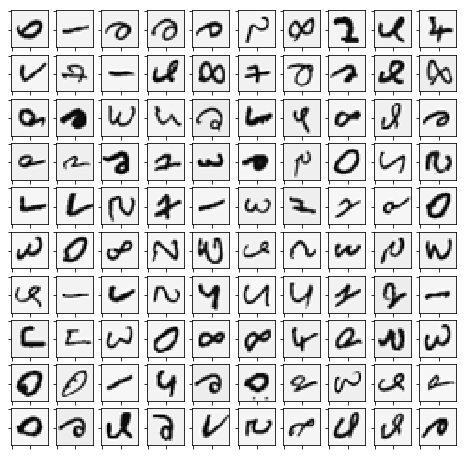

[ 0.  1.  6.  6.  6.  5.  8.  4.  2.  7.  7.  4.  1.  2.  8.  4.  6.  6.
  2.  8.  9.  6.  3.  3.  6.  7.  2.  8.  2.  6.  9.  9.  6.  4.  3.  6.
  5.  0.  2.  5.  7.  7.  5.  4.  1.  3.  4.  4.  9.  0.  3.  0.  8.  5.
  3.  2.  5.  3.  5.  3.  2.  1.  7.  5.  2.  2.  2.  4.  9.  1.  7.  7.
  3.  0.  8.  8.  7.  9.  3.  3.  0.  0.  1.  2.  6.  0.  9.  3.  2.  9.
  0.  6.  2.  6.  7.  5.  8.  2.  2.  6.]


In [65]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

amount = 100
lines = 10
columns = 10
image = np.zeros((amount, 20, 20))
number = np.zeros(amount)

for i in range(amount):
    rnd = random.randint(0,4999)
    image[i] = x[rnd].reshape(20, 20)
    y_temp = y.reshape(m,)
    number[i] = y_temp[rnd]
fig = plt.figure(figsize=(8,8))

for i in range(amount):
    ax = fig.add_subplot(lines, columns, 1 + i)
    
    # Turn off tick labels
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.imshow(image[i], cmap='binary')
plt.show()
print(number)

# 2. Model Representation
Our neural network is shown in below figure. It has <strong>3 layers an input layer, a hidden layer and an output layer</strong>. Recall that our <strong>inputs are pixel</strong> values of digit images. Since the images are of <strong>size 20×20</strong>, this gives us <strong>400 input layer units</strong> (excluding the extra bias unit which always outputs +1).<br><br><img src='img/nn.jpg'><br>
You have been provided with a set of <strong>network parameters (Θ<sup>(1)</sup>; Θ<sup>(2)</sup>)</strong> already trained by instructor.<br><br>
<strong>Theta1 and Theta2 The parameters have dimensions that are sized for a neural network with 25 units in the second layer and 10 output units (corresponding to the 10 digit classes).</strong>

In [66]:
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10
lambda_ = 1

In [67]:
print('theta1 shape = {}, theta2 shape = {}'.format(theta1.shape,theta2.shape))

theta1 shape = (25, 401), theta2 shape = (10, 26)


It seems our weights are transposed, so we transpose them to have them in a way our neural network is.

In [68]:
theta1 = theta1.transpose()
theta2 = theta2.transpose()
print('theta1 shape = {}, theta2 shape = {}'.format(theta1.shape,theta2.shape))

theta1 shape = (401, 25), theta2 shape = (26, 10)


<strong>Becuase the initial dataset has changed and mapped 0 to "10", so the weights also are changed. So we just rotate columns one step to right, to predict correct values.<br>
Recall we have changed mapping 0 to "10" to 0 to "0" but we cannot detect this mapping in weights of neural netwrok. So we have to this rotation on final output of probabilities.</strong>

In [69]:
def rotate_column(array):
    array_ = np.zeros(shape=array.shape)
    temp = np.zeros(array_.shape[1],)
    temp= array[:,(array_.shape[1]-1)]
    array_[:,1:(array_.shape[1])] = array[:,0:(array_.shape[1]-1)]
    array_[:,0] = temp
    return array_

# 3 Backpropagation
In this part of the exercise, you will implement the <strong>backpropagation</strong> algorithm to compute the <strong>gradient</strong> for the neural network <strong>cost function</strong>. Once you have computed the gradient, you will be able to train the neural network by minimizing the cost function <strong>J(Θ)</strong> using an advanced optimizers like `fmin_cg`. <br>
You will first implement the backpropagation algorithm to compute the gradients for the parameters for the neural network. And you have to verify your gradient is correct.

### 3.A Encoding y Labels (onehot) 
Recall that whereas the original labels (in the variable y) were 1, 2, ..., 10, for the purpose of training a neural network, we need to <strong>recode the labels</strong> as vectors containing only values 0 or 1, so that: <img src='img/y.jpg'><br><br>
For example, if x<sup>(i)</sup> is an image of the digit 5, then the corresponding y<sup>(i)</sup> (that you should use with the cost function) should be a 10-dimensional vector with y<sub>5</sub> = 1, and the other elements equal to 0.<br><br>
For encoding y labels, we use <a href='http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html'>OneHotEncoder</a>.

In [70]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(categorical_features='all',sparse=False) # encode all labels form 0 to 9
y = one_hot_encoder.fit_transform(y)

In [71]:
print('y.shape={}\ny[0]={}\ny[500]={} and ...'.format(y.shape,y[0],y[500]))

y.shape=(5000, 10)
y[0]=[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
y[500]=[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.] and ...


## 3.B Sigmoid Gradient
To help you get started with this part of the exercise, you will first implement the <strong>sigmoid gradient function</strong>. The gradient for the sigmoid function can be computed as : <img src ='img/g_grad.jpg'>
Where <img src= 'img/sig.jpg'>

<strong>Implementation Note:</strong> For large values (both positive and negative) of z, the gradient should be close to 0. When z = 0, the gradient should be exactly 0.25. Your code should also work with vectors and matrices. For a matrix, your function should perform the sigmoid gradient function on every element.

In [72]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def sigmoid_gradient(z):
    return sigmoid(z)*(1-sigmoid(z))

In [73]:
# evaluating sigmoid_gradient(z)
print(sigmoid_gradient(np.array([-1,-0.5,0.5,1])))
print('{} , {} , {}'.format(sigmoid_gradient(464646),sigmoid_gradient(-465454),sigmoid_gradient(0)))

[ 0.19661193  0.23500371  0.23500371  0.19661193]
0.0 , 0.0 , 0.25


## 3.C Random Initialization
When training neural networks, it is important to <strong>randomly initialize the parameters</strong> for <strong>symmetry breaking</strong>. One effective strategy for random initialization is to randomly select values for <strong>Θ<sup>(l)</sup> uniformly</strong> in the <strong>range [-epsilon<sub>init</sub>,+epsilon<sub>init</sub>].<br></strong>
You should use <strong>epsilon<sub>init</sub> = 0.12</strong> .<br><br>
This range of values ensures that the parameters are kept small and makes the learning more efficient.

`rand_init_weights(L_in, L_out):` randomly initializes the weights of a layer with L_in incoming connections and L_out outgoing  connections. we use <a href='https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.uniform.html'>scipy.random.unifrom</a> function to do this.<br><br>
Note that return matrix should be set to <strong>a matrix of size(L_out, 1 + L_in</strong>) as the first column of it handles the <strong>"bias"</strong> terms.

In [74]:
epsilon_init = 0.12 # hyper parameter for random weight initializiation

def rand_init_weights(L_in, L_out,epsilon_init = 0.12):
    return scipy.random.uniform(low=-epsilon_init,high=epsilon_init,size=(L_in,L_out))

## 3.C Backpropagation
<img src='img/backprop.jpg'><br>
Now, you will implement the backpropagation algorithm. Recall that the intuition behind the backpropagation algorithm is as follows: Given a training example <strong>(x(t); y(t))</strong>, we will first run a <strong>"forward pass"</strong> to compute all the<strong> activations </strong>throughout the network, including the <strong>output value of the hypothesis h<sub>Θ</sub>(x).</strong> Then, for each node `j` in layer `l`, we would like to compute an <strong>"error term" δ<sup>(l)</sup><sub>j</sub> </strong>that measures how much that node was <strong>"responsible" for any errors </strong>in our output.<br><br>
For an <strong>output node</strong>, we can directly measure the difference between the network’s activation and the true target value, and use that to define <strong>δ<sup>(3)</sup><sub>j</sub> </strong>(since layer 3 is the output layer). For the <strong>hidden units</strong>, you will compute <strong>δ<sup>(l)</sup><sub>j</sub> based on a weighted average of the error terms </strong>of the nodes <strong>in layer (l + 1)</strong>.<br><br>
You should implement steps 1 to 4 in <strong>a loop that processes one example at a time</strong>. Concretely, you should implement a for-loop for `t = 1:m` and place steps 1-4 below inside the for-loop, with the t<sup>th</sup> iteration performing the calculation on the t<sup>th</sup> training example </strong>(x(t); y(t))</strong>. Step 5 will <strong>divide the accumulated gradients by m</strong> to obtain the gradients for the neural network cost function.

#### Step 1
Set the input layer’s values (a<sup>(1)</sup>) to the t-th training example x(t). Perform a feedforward pass, computing the activations (z<sup>(2)</sup>; a<sup>(2)</sup>; z<sup>(3)</sup>; a<sup>(3)</sup>) for layers 2 and 3. Note that you need to add a +1 term to ensure that the vectors of activations for layers a<sup>(1)</sup> and a<sup>(2)</sup> also include the bias unit. 

###### Cost and Gradient Function
`compute_cost(theta_flatten,x,y,lambda_,input_layer_size,hidden_layer_size,num_labels):` implements the neural network cost function for a two layer
neural network which performs classification.<br>
The returned parameter `grad` should be a <strong>"unrolled"</strong> vector of the <strong>partial derivatives </strong>of the neural network. <br><br>
Recall that the cost function for the neural network (with regularization) is: <img src='img/j_reg.jpg'><br><br>
where <strong>h<sub>θ</sub>(x<sup>(i)</sup>)</strong> is computed as shown in the section 2 and <strong>K = 10 is the total number of possible labels</strong>. Note that <strong>h<sub>θ</sub>(x<sup>(i)</sup>)<sub>k</sub> = a<sup>(3)</sup><sub>k</sub></strong> is the activation (output value) of the k-th output unit.<br>

#### Step 2
For each output unit k in layer 3 (the output layer), set <img src='img/delta.jpg'>
where <strong>y<sub>k</sub></strong> indicates whether the current training example <strong>belongs to class k (y<sub>k</sub> = 1)</strong>, or if it belongs to a <strong>different class (y<sub>k</sub> = 0).</strong> You may find one hot encoding helpful for this task.

#### Step 3
For the hidden layer l = 2, set : <img src='img/hidden_backprop.jpg'>

#### Step 4
<strong>Accumulate the gradient</strong> from this example using the following formula:<img src='img/acc_grad.jpg'>

Note that you should <strong>skip or remove δ<sub>0</sub><sup>(2)</sup>.</strong>

#### Step 5
Obtain the <strong>gradient</strong> for the neural network cost function by <strong>dividing the accumulated gradients by `m`</strong> : <img src='img/grad_reg.jpg'>

<strong>Implementation Note:</strong> The matrix X contains the examples in rows. When you complete the code, <strong>you will need to add the column of 1’s</strong> to the matrix.

In [75]:
# adding column of 1's to x
x = np.append(np.ones(shape=(m,1)),x,axis = 1)

**Note:** We have to separate `compute_cost()` and `compute_gradient()` functions to pass them as argument to `fmin_cg` optimizer.

In [76]:
def compute_cost(theta_flatten,x,y,lambda_,input_layer_size,hidden_layer_size,num_labels):
    theta_flatten = theta_flatten.reshape(1,-1)
    
    # retrieve theta values from flattened theta 
    theta_hidden = theta_flatten[0,0:((input_layer_size+1)*hidden_layer_size)]
    theta_hidden = theta_hidden.reshape((input_layer_size+1),hidden_layer_size)
    
    theta_output = theta_flatten[0,((input_layer_size+1)*hidden_layer_size):]
    theta_output = theta_output.reshape(hidden_layer_size+1,num_labels)
   
    # start of section 1
    a1 = x # 5000x401
    z2 = np.dot(a1,theta_hidden) # 5000x25
    a2 = sigmoid(z2)

    a2 = np.append(np.ones(shape=(a1.shape[0],1)),a2,axis = 1) # 5000x26 # adding column of 1's to a2
    z3 = np.dot(a2,theta_output) # 5000x10
    a3 = sigmoid(z3) # a3 = h(x) w.r.t theta

    a3 = rotate_column(a3) # mapping 0 to "0" instead of 0 to "10"
    # end of section 1

    term1 = np.sum((-y*(np.log(a3)) - (1-y)*(np.log(1 - a3))),axis = 1 )
    term2 = lambda_*(np.sum(theta_output[1:,:]**2)+np.sum(theta_hidden[1:,:]**2))/(2*a1.shape[0]) # note that exclude theta1(0) and theta2(0)
    j = np.sum(term1)/m+term2
    
    return j

In [77]:
def compute_gradient(theta_flatten,x,y,lambda_,input_layer_size,hidden_layer_size,num_labels):
    theta_flatten = theta_flatten.reshape(1,-1)
    
    # retrieve theta values from flattened theta 
    theta_hidden = theta_flatten[0,0:((input_layer_size+1)*hidden_layer_size)]
    theta_hidden = theta_hidden.reshape((input_layer_size+1),hidden_layer_size)
    
    theta_output = theta_flatten[0,((input_layer_size+1)*hidden_layer_size):]
    theta_output = theta_output.reshape(hidden_layer_size+1,num_labels)
   
    # start of section 1
    a1 = x # 5000x401
    z2 = np.dot(a1,theta_hidden) # 5000x25
    a2 = sigmoid(z2)

    a2 = np.append(np.ones(shape=(a1.shape[0],1)),a2,axis = 1) # 5000x26 # adding column of 1's to a2
    z3 = np.dot(a2,theta_output) # 5000x10
    a3 = sigmoid(z3) # a3 = h(x) w.r.t theta

    a3 = rotate_column(a3) # mapping 0 to "0" instead of 0 to "10"
    # end of section 1
       
    # strat of section 2
    delta3 = a3 - y # 5000x10
    # end of section 2

    # start of section 3
    delta2 = (np.dot(delta3,theta_output.transpose()))[:,1:] # 5000x25 # drop delta2(0)
    delta2 = delta2*sigmoid_gradient(z2)
    # end of section 3

    # start of section 4
    DELTA2 = np.dot(a2.transpose(),delta3) # 26x10
    DELTA1 = np.dot(a1.transpose(),delta2) # 401x25
    # end of section 4
    
    # start of section 5
    theta_hidden_ = np.append(np.ones(shape=(theta_hidden.shape[0],1)),theta_hidden[:,1:],axis = 1) # regularization
    theta_output_ = np.append(np.ones(shape=(theta_output.shape[0],1)),theta_output[:,1:],axis = 1) # regularization
    
    D1 = DELTA1/a1.shape[0] + (theta_hidden_*lambda_)/a1.shape[0]
    D2 = DELTA2/a1.shape[0] + (theta_output_*lambda_)/a1.shape[0]
    # end of section 5

    Dvec = np.append(D1,D2)
    
    return Dvec

In [78]:
theta_flatten = np.append(theta1,theta2)

lambda_ = 1
# with lambda_ = 1 ===> cost = 0.383770
j_test = compute_cost(theta_flatten,x,y,lambda_,input_layer_size,hidden_layer_size,num_labels)
print('lambda = 1 ===> cost = {}'.format(j_test))

lambda_ = 3
# with lambda_ = 3 ===> cost = 0.576051
j_test2 = compute_cost(theta_flatten,x,y,lambda_,input_layer_size,hidden_layer_size,num_labels)
print('lambda = 3 ===> cost = {}'.format(j_test2))

lambda = 1 ===> cost = 0.38376985909092365
lambda = 3 ===> cost = 0.5760512469501331


## 4. Gradient Checking
In your neural network, you are<strong> minimizing the cost function J(Θ)</strong>. To perform gradient checking on your parameters, you can imagine "unrolling" the parameters Θ(1); Θ(2) into a long vector θ. By doing so, you can think of the cost function being J(θ) instead and use the following gradient checking procedure.<br>
Suppose you have a function <strong>f<sub>i</sub>(θ)</strong> that purportedly computes: <img src='img/dj.jpg'>; you’d like to check if <strong>f<sub>i</sub> is outputting correct derivative values</strong>. Let <img src='img/theta_dif.jpg'><br><br><br>
So, θ<sup>(i+)</sup> is the same as θ, except its <strong>i-th element has been incremented</strong> by epsilon. Similarly, θ<sup>(i-)</sup> is the corresponding vector with the <strong>i-th element decreased</strong> by epsilon. You can now <strong>numerically verify f<sub>i</sub>(θ)’s correctness</strong> by checking, for each <strong>i</strong>, that:<img src='img/fi.jpg'>

The degree to which these two values should approximate each other will depend on the details of J. But assuming <strong>epsilon = 10−e4</strong>, you’ll usually find that the left- and right-hand sides of the above will <strong>agree to at least 4 significant digits</strong> (and often many more).

In the next step we provide a function which will <strong>create a small neural network and dataset</strong> that will be used for <strong>checking your gradients</strong>. If your backpropagation implementation is correct,you should see a <strong>relative difference that is less than 1e-9</strong>.

<strong>Practical Tip:</strong> <strong>When performing gradient checking, it is much more efficient to use a small neural network with a relatively small number of input units and hidden units, thus having a relatively small number of parameters.</strong> Each dimension of θ requires two evaluations of the cost function and this can be expensive. Furthermore, after
you are confident that your gradient computations are correct, you should turn off gradient checking before running your learning algorithm.

In [79]:
e=10e-4
d1 = compute_cost((theta_flatten+e),x[0].reshape(1,-1),y[0].reshape(1,-1),lambda_,input_layer_size,hidden_layer_size,num_labels)
d2 = compute_cost((theta_flatten-e),x[0].reshape(1,-1),y[0].reshape(1,-1),lambda_,input_layer_size,hidden_layer_size,num_labels)
g = compute_gradient((theta_flatten),x[0].reshape(1,-1),y[0].reshape(1,-1),lambda_,input_layer_size,hidden_layer_size,num_labels)
res = (d1-d2)/(2*e)
res

-241.37261560747447

# 5. Learning Parameters Using `scipy.optimize.fmin_cg`
<strong>Scipy</strong>'s <strong>fmin_cg</strong> is an optimization solver that finds <strong>the minimum of a function</strong>. For regularized logistic regression, you want to optimize the cost function J(θ) with parameters θ. Concretely, you are going to use <strong>fmin_cg</strong> to find the best parameters θ for the regularized logistic regression cost function, given a fixed dataset (of x and y values). You will pass to <strong>fmin_cg</strong> the following inputs:<br>
    <li> The initial values of the parameters we are trying to optimize.</li>
    <li> A function that, when given the training set and a particular θ, computes the regularized logistic regression cost with respect to θ for the dataset (x, y) ======> <strong>compute_cost</strong></li>
    <li> A function that, when given the training set and a particular θ, computes the regularized logistic regression gradient with respect to θ for the dataset (x, y) ======> <strong>compute_gradient</strong></li>

For doing this step, we have many complex optimization fucntions. For optimizing this problem, we use this library <strong><a href='https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.optimize.fmin_cg.html'>scipy.optimize.fmin_cg</a></strong>.

Now some explanation about below code that do all loops and updates and other calculations only in one line.<br>
we need two functions, one for cost and the other for gradient that described above. all should have inputs you assgning for <strong>X0</strong> and <strong>args</strong>.<br>
All of your functions should <strong>return just one variable</strong> which <strong>for cost, optimizer just minmize its return value but for gradient, because the target variable is theta which you specified by X0, optimizer will update theta to minimize cost</strong>.<br>
And at last, you define the <strong>mathematical model</strong> to do this <strong>optimization</strong>.

In [83]:
lambda_ = 1

# import library
import scipy.optimize as opt

#theta_random_flatten = np.append(rand_init_weights(*theta1.shape),rand_init_weights(*theta2.shape))

theta_random_flatten = np.append(np.random.rand(*theta1.shape), np.random.rand(*theta2.shape))
new_theta = opt.fmin_cg(f=compute_cost,fprime=compute_gradient,maxiter=400,x0 = theta_random_flatten
                        ,args=(x,y,lambda_,input_layer_size,hidden_layer_size,num_labels))

# the below code do exactly as above with different solver. Try out!
#optimized = opt.minimize(fun=compute_cost,x0 = theta_random_flatten,  method = 'TNC', jac=compute_gradient
#                         ,args = (x,y,lambda_,input_layer_size,hidden_layer_size,num_labels))


         Current function value: 4.643489
         Iterations: 1
         Function evaluations: 123
         Gradient evaluations: 110


## 5.A Accuracy and Evaluating
We use our new theta values to predict on train values to get accuracy on train data. **Expected value is about 95.5%**.

<strong>predict(theta_flatten, x):</strong> outputs the predicted label of x given the trained weights of a neural network (theta1, theta2).

In [181]:
def predict(theta_flatten,x,input_layer_size,hidden_layer_size,num_labels):
    theta_flatten = theta_flatten.reshape(1,-1)
    
    # retrieve theta values from flattened theta 
    theta_hidden = theta_flatten[0,0:((input_layer_size+1)*hidden_layer_size)]
    theta_hidden = theta_hidden.reshape((input_layer_size+1),hidden_layer_size)
    
    theta_output = theta_flatten[0,((input_layer_size+1)*hidden_layer_size):]
    theta_output = theta_output.reshape(hidden_layer_size+1,num_labels)
    
    # start of section 1
    a1 = x # 5000x401
    z2 = np.dot(a1,theta_hidden) # 5000x25
    a2 = sigmoid(z2)

    a2 = np.append(np.ones(shape=(a1.shape[0],1)),a2,axis = 1) # 5000x26 # adding column of 1's to a2
    z3 = np.dot(a2,theta_output) # 5000x10
    a3 = sigmoid(z3) # a3 = h(x) w.r.t theta

    a3 = rotate_column(a3) # mapping 0 to "0" instead of 0 to "10"
    
    # prediction on activation a2
    y_pred = np.argmax(a3, axis=1).reshape(-1,1)
    return y_pred

Now we will compare our predicted result to the true one with <a href='http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html'>confusion_matrix</a> of numpy library.

In [177]:
def accuracy_on_cm(confusion_matrix):
    t = np.trace(confusion_matrix)
    f = np.sum(confusion_matrix) - t
    ac = t/(t+f)
    return (t,f,ac)

In [187]:
y_pred = predict(theta_random_flatten,x,input_layer_size,hidden_layer_size,num_labels)
y_pred.shape

(5000, 1)

In [188]:
#import library
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix((y_df.iloc[:,:].values).reshape(m,),y_pred.reshape(m,))
t,f,ac = acc(cm_train)
print('With #{} correct, #{} wrong ==========> accuracy = {}%'
          .format(t,f,ac*100))

With #500 correct, #4500 wrong ==========> accuracy = 10.0%


In [189]:
cm_train

array([[  0,   0, 500,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 500,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 500,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 500,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 500,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 500,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 500,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 500,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 500,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 500,   0,   0,   0,   0,   0,   0,   0]], dtype=int64)

In [185]:
y_pred

array([[2],
       [2],
       [2],
       ..., 
       [2],
       [2],
       [2]], dtype=int64)